# Pseudo Spectral Methods
### Lehner White

In [1]:
import seaborn
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

/Users/Lehner/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Problem 1:

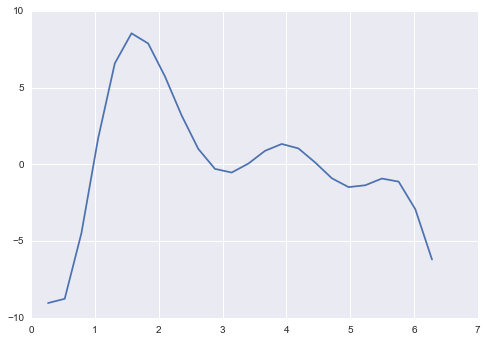

In [2]:
N=24
x1 = (2.*np.pi/N)*np.arange(1,N+1)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

# This array is reordered in Python to
# accomodate the ordering inside the fft function in scipy.
k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}✬(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0,1) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

fp2_hat = ((1j*k)*fp_hat)
fp2 = np.real(ifft(fp2_hat))

sol = 0.5 * fp2 - fp

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)

plt.plot(x1,sol)
plt.savefig('spectral2_derivative.pdf')
plt.show()

## Problem 2:

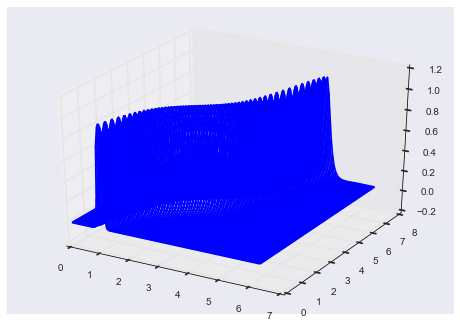

In [3]:
t_steps = 150 # Time steps
x_steps = 100 # x steps

x1 = np.linspace(0, 2*np.pi, x_steps)
t = np.linspace(0, 8, t_steps)
t0, t1 = 0, 8

k = np.concatenate(( np.arange(0,x_steps/2) ,
                    np.array([0]) ,
                    np.arange(-x_steps/2+1,0,1) ))

c = lambda x : .2 + np.sin(x - 1)**2
c0 = c(x1)

u = lambda x : np.exp(-100*(x - 1)**2)
u0 = u(x1)

f = lambda x, temp : -c0 * np.real(ifft((1j*k) * fft(x)))

sol = odeint(f, u0, t)

X,Y = np.meshgrid(x1, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X,Y,sol)
plt.show()